# Code to support the SHM chapter
October 2023



In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines
import matplotlib.patches as patches



#Animations
from matplotlib import animation, rc
from IPython.display import HTML, Image

## Illustrating a phase shift between two oscillators

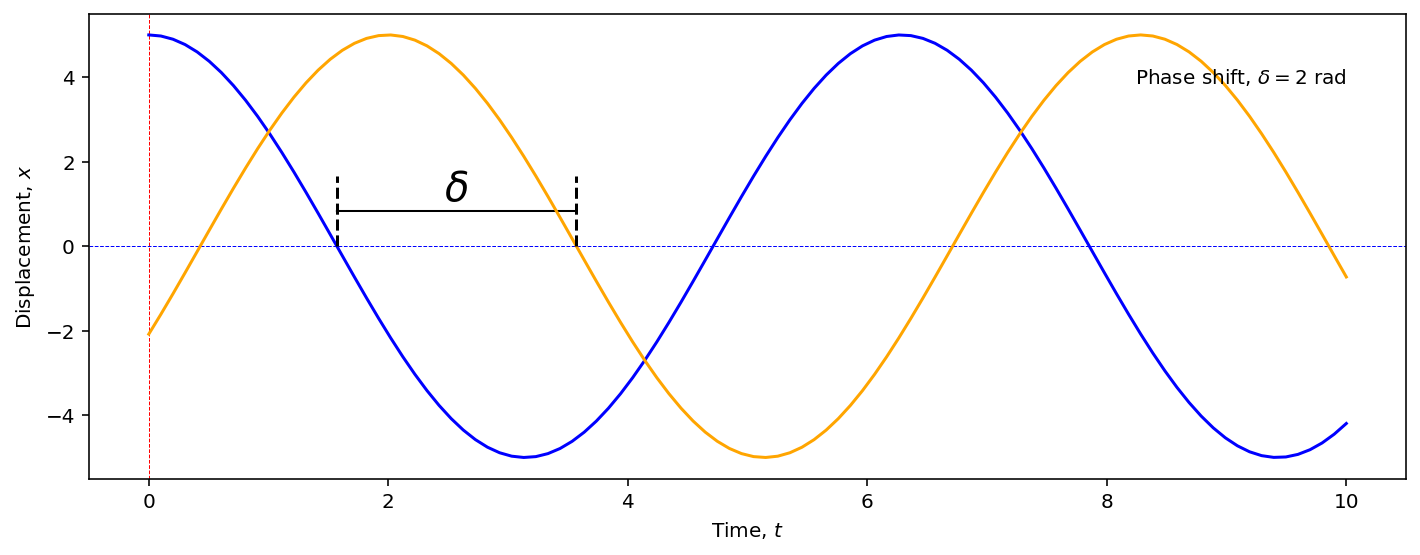

In [2]:
t = np.linspace(0,10,100)
omega_1 = 1
delta_1 = 0
delta_2 = 2
A_0 = 5

def shm(thing, shift):
    x = A_0*np.cos(omega_1*thing - shift)
    return x

#plt.xkcd(scale=5, length=3500, randomness=20)

fig = plt.figure(figsize=(10,4))
plt.ylabel('Displacement, $x$')
plt.xlabel('Time, $t$')

plt.axvline(x=0,linewidth=0.5,color='r',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='b',linestyle="--")
plt.text(10, 4,'Phase shift, $\delta = $'+str(delta_2)+' rad', ha="right", va="center", size=10)
plt.plot(t, shm(t,delta_1),color='blue')
plt.plot(t, shm(t,delta_2),color='orange')
plt.plot([np.pi/2,np.pi/2],[0,A_0/3],color='black',linestyle='--')
plt.plot([np.pi/2+delta_2,np.pi/2+delta_2],[0,A_0/3],color='black',linestyle='--')
plt.arrow(np.pi/2, A_0/6, delta_2, 0)
plt.text((np.pi/2+(delta_2/2)), A_0/6+0.5,'$\delta$', ha="center", va="center", size=20)




plt.tight_layout()
plt.savefig('ch1-shmpos.pdf',transparent=True)
plt.savefig('ch1-shmpos.svg',transparent=True)
#plt.title('Test')
plt.show()


## Comparing position, velocity and acceleration

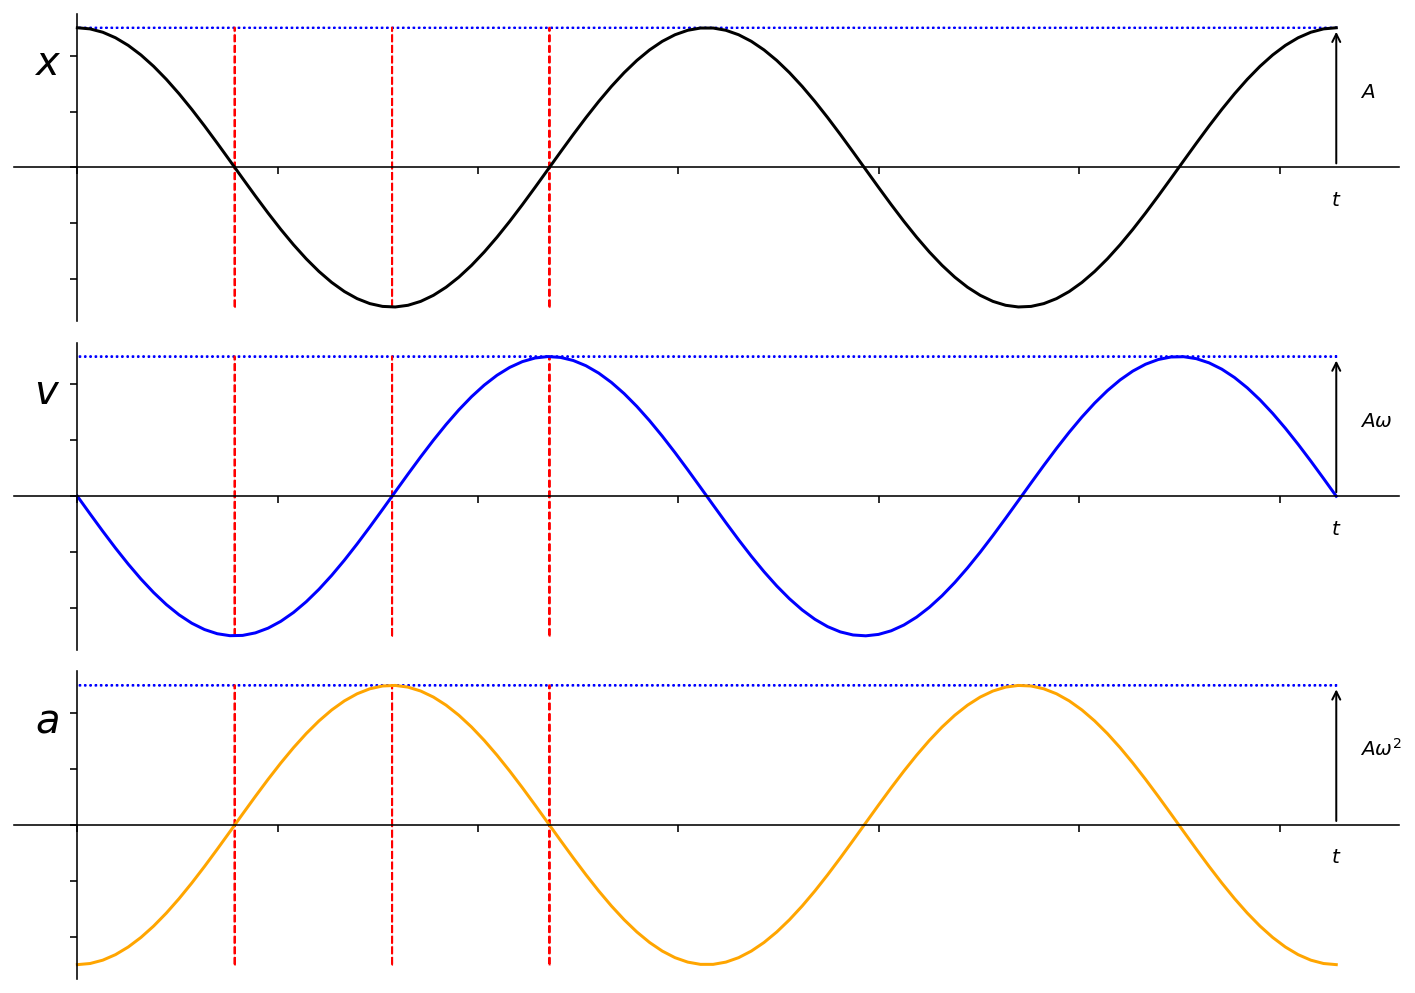

In [3]:
t = np.linspace(0,4*np.pi,100)
omega_1 = 1
delta1 = 0
delta2 = np.pi/2
delta3 = np.pi
delta_arr=[delta1,delta2,delta3]
color_arr=['black','blue','orange']
label_arr=['$x$','$v$','$a$']
amp_arr = ['$A$','$A\omega$','$A \omega^2$']
A_0 = 5
nfig = 3

n_figures=np.arange(0,nfig)

def shm(thing, shift):
    x = A_0*np.cos(omega_1*thing + shift)
    return x

fig,(ax)=plt.subplots(3,1,sharex=False,sharey='all',squeeze=True,figsize=(10,7))
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots

#plt.annotate(s='', xy=(1,1), xytext=(0,0), arrowprops=dict(arrowstyle='<->'))

for n in n_figures:
    ax[n].plot(t, shm(t,delta_arr[n]),color=color_arr[n])
    ax[n].set_xticklabels([])
    ax[n].set_yticklabels([])
#    ax[n].set_ylabel('')
#    ax[n].set_xlabel('t')
#    ax[n].axhline(y=A_0,linewidth=0.5,color='b',linestyle="--")
    ax[n].arrow(0,A_0,4*np.pi,0,color='b',linestyle='dotted')
#    ax[n].axvline(x=delta_arr[n],linewidth=0.5,color='r',linestyle="--")
#    ax[n].axis("off")
    ax[n].spines['bottom'].set_position('zero')
    ax[n].spines['top'].set_color('none')
    ax[n].spines['left'].set_position('zero')
    ax[n].spines['right'].set_color('none')
    ax[n].text(s=label_arr[n], x=-0.3, y=0.6*A_0, va='bottom', ha='center',size=20)
    ax[n].text(s='$t$', x=4*np.pi, y=-0.3*A_0, va='bottom', ha='center')
    ax[n].annotate('', xy=(4*np.pi,A_0), xytext=(4*np.pi,0), arrowprops=dict(arrowstyle='->'))
    ax[n].annotate(amp_arr[n], xy=(2, 1), xytext=(12.8, A_0/2))
    ax[n].arrow(np.pi/2,A_0,0,-2*A_0,color='r',linestyle='--')
    ax[n].arrow(np.pi,A_0,0,-2*A_0,color='r',linestyle='--')
    ax[n].arrow(3*np.pi/2,A_0,0,-2*A_0,color='r',linestyle='--')



    
#transFigure = fig.transFigure.inverted()
#
#coord1a = transFigure.transform(ax[0].transData.transform([np.pi/2,A_0]))
#coord2a = transFigure.transform(ax[2].transData.transform([np.pi/2,-A_0]))
#
#coord1b = transFigure.transform(ax[0].transData.transform([np.pi,A_0]))
#coord2b = transFigure.transform(ax[2].transData.transform([np.pi,-A_0]))
#
#coord1c = transFigure.transform(ax[0].transData.transform([1.5*np.pi,A_0]))
#coord2c = transFigure.transform(ax[2].transData.transform([1.5*np.pi,-A_0]))
#
#linea = mplines.Line2D((coord1a[0],coord2a[0]),(coord1a[1],coord2a[1]),
#                               transform=fig.transFigure,color='r',linestyle='--')
#
#lineb = mplines.Line2D((coord1b[0],coord2b[0]),(coord1b[1],coord2b[1]),
#                               transform=fig.transFigure,color='r',linestyle='--')
#
#linec = mplines.Line2D((coord1c[0],coord2c[0]),(coord1c[1],coord2c[1]),
#                               transform=fig.transFigure,color='r',linestyle='--')
#fig.lines = linea, lineb, linec

# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/spine_placement_demo.html
#plt.xlabel('t')
plt.tight_layout()
plt.savefig('ch1-xvacomp.pdf',transparent=True)
plt.savefig('ch1-xvacomp.png',transparent=True)
plt.savefig('ch1-xvacomp.svg',transparent=True)
plt.show()

## Circular motion of SHM

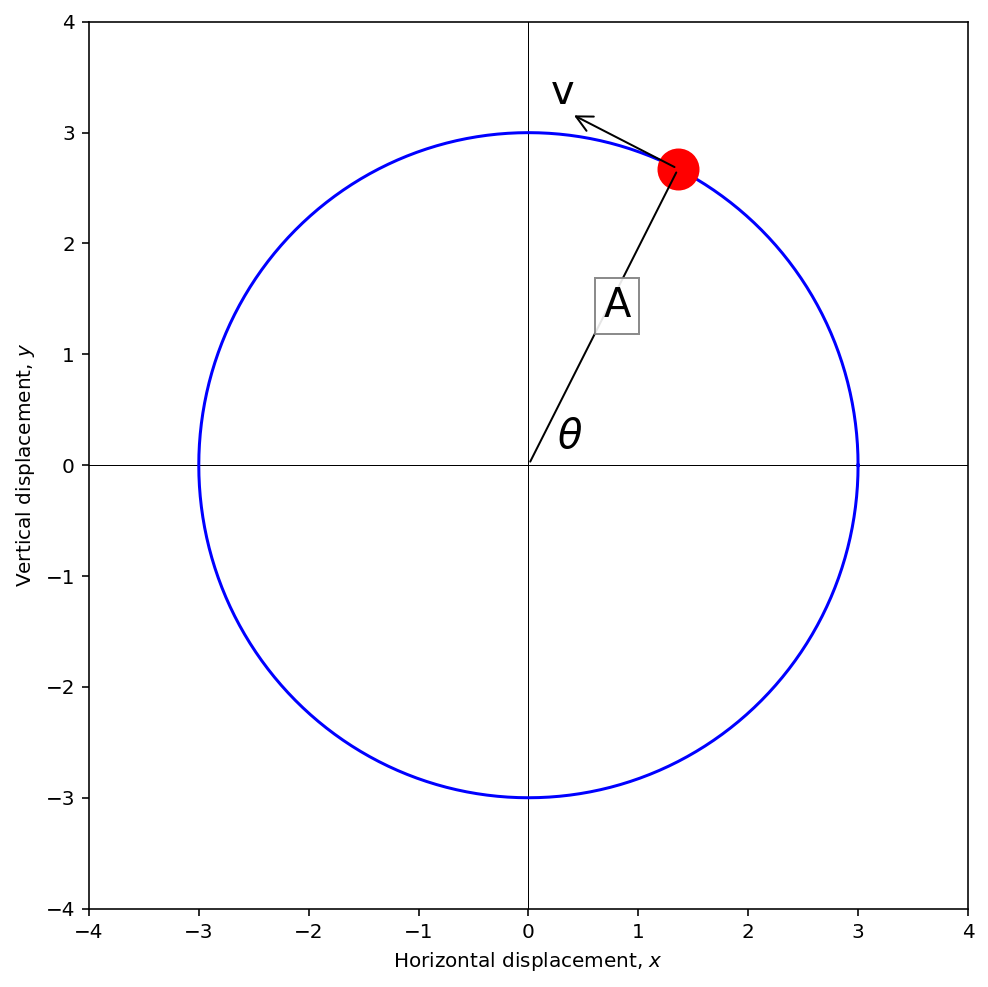

In [21]:
r = 3
theta = np.linspace(0,2*np.pi,201)
arrowlength = 1.1
phi = theta+np.pi/2

sample_point = 35
sample_pointb =sample_point/2

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.figure(figsize=(7,7))

ax = plt.axes()
ax.set_ylabel('Vertical displacement, $y$')
ax.set_xlabel('Horizontal displacement, $x$')


ax.axvline(x=0,linewidth=0.5,color='k',linestyle="-")
ax.axhline(y=0,linewidth=0.5,color='k',linestyle="-")

#plt.axvline(x=0,linewidth=0.5,color='r',linestyle="--")
#plt.axhline(y=0,linewidth=0.5,color='b',linestyle="--")
#plt.text(10, 4,'Phase shift, $\delta = $'+str(delta_2), ha="right", va="center", size=10)
ax.plot(x, y,color='blue')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
#plt.plot(t, shm(t,delta_2),color='orange')
#ax.set_size(5,5)

ax.annotate('', xy=(x[sample_point],y[sample_point]), 
            xytext=((x[sample_point]+arrowlength*np.cos(phi[sample_point])),
                    y[sample_point]+arrowlength*np.sin(phi[sample_point])), 
            arrowprops=dict(arrowstyle='<-'),size = 20)
ax.annotate('v', xy=(x[sample_point],y[sample_point]), 
            xytext=((x[sample_point]+(arrowlength+0.2)*np.cos(phi[sample_point])),
                    y[sample_point]+(arrowlength+0.2)*np.sin(phi[sample_point])), size=20 )
            #arrowprops=dict(arrowstyle='<-'),size = 20)

ax.annotate('', xy=(0,0), xytext=((x[sample_point]),y[sample_point]), arrowprops=dict(arrowstyle='-'))
ax.text(0.5*x[sample_point], 0.5*y[sample_point], "A",  rotation=0,size=20, bbox=dict(fc="w", ec="0.5", alpha=0.9))
ax.plot(x[sample_point],y[sample_point],'ro',markersize='20')

ax.text(0.1*x[int(sample_pointb)], 0.1*y[int(sample_pointb)], "$θ$",  rotation=0,size=20)


plt.tight_layout()
plt.savefig('ch1-shmcircular.pdf',transparent=True)
plt.savefig('ch1-shmcircular.png',transparent=True)
plt.savefig('ch1-shmcircular.svg',transparent=True)
plt.show()

## Energy in SHM

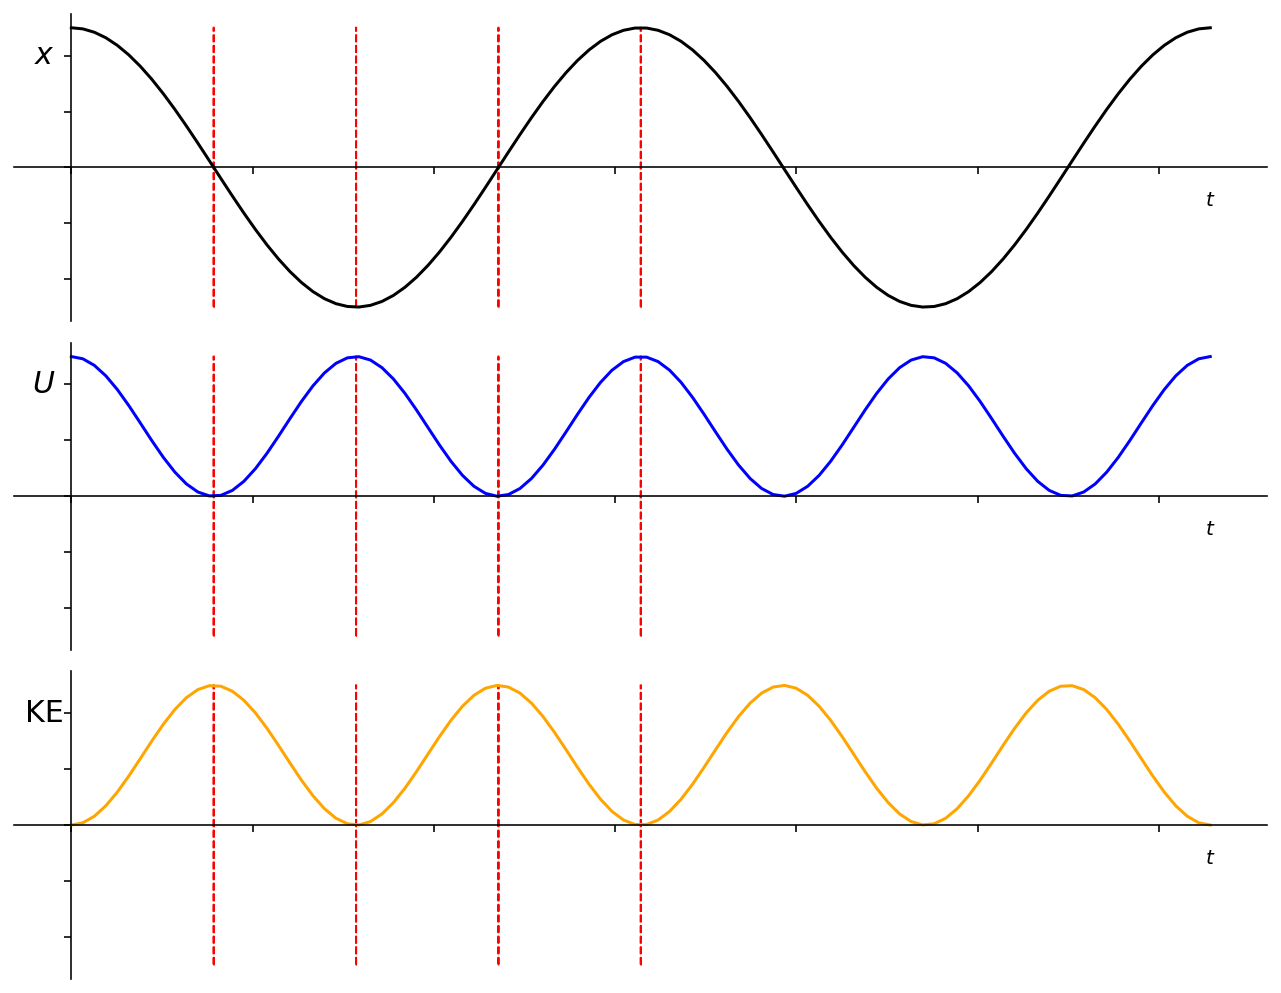

In [3]:
t = np.linspace(0,4*np.pi,100)
omega_1 = 1
delta1 = 0
delta2 = np.pi/2
delta3 = np.pi
delta_arr=[delta1,delta2,delta3]
color_arr=['black','blue','orange']
label_arr=['$x$','$U$','KE']
amp_arr = ['$A$','$A\omega$','$A \omega^2$']
A_0 = 5
nfig = 3

n_figures=np.arange(0,nfig)

def shm(thing, shift):
    x = A_0*np.cos(omega_1*thing + shift)
    return x

def pot_energy(thing,shift):
    u = A_0*(np.cos(omega_1*thing + shift))**2
    return u

def kin_energy(thing,shift):
    KE = A_0*(np.sin(omega_1*thing + shift))**2
    return KE

fig,(ax)=plt.subplots(3,1,sharex=False,sharey='all',squeeze=True,figsize=(9,7))
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots

#plt.annotate(s='', xy=(1,1), xytext=(0,0), arrowprops=dict(arrowstyle='<->'))

for n in n_figures:
#    ax[n].plot(t, shm(t,delta_arr[n]),color=color_arr[n])
    ax[n].set_xticklabels([])
    ax[n].set_yticklabels([])
#    ax[n].set_ylabel('')
#    ax[n].set_xlabel('t')
#    ax[n].axhline(y=A_0,linewidth=0.5,color='b',linestyle="--")
#    ax[n].axvline(x=delta_arr[n],linewidth=0.5,color='r',linestyle="--")
#    ax[n].axis("off")
    ax[n].spines['bottom'].set_position('zero')
    ax[n].spines['top'].set_color('none')
    ax[n].spines['left'].set_position('zero')
    ax[n].spines['right'].set_color('none')
    ax[n].text(s=label_arr[n], x=-0.3, y=0.7*A_0, va='bottom', ha='center',size = 15)
    ax[n].arrow(np.pi/2,A_0,0,-2*A_0,color='r',linestyle='--')
    ax[n].arrow(np.pi,A_0,0,-2*A_0,color='r',linestyle='--')
    ax[n].arrow(3*np.pi/2,A_0,0,-2*A_0,color='r',linestyle='--')
    ax[n].arrow(4*np.pi/2,A_0,0,-2*A_0,color='r',linestyle='--')
    ax[n].text(s='$t$', x=4*np.pi, y=-0.3*A_0, va='bottom', ha='center')




#    ax[n].text(s='$t$', x=4*np.pi, y=-0.3*A_0, va='bottom', ha='center')
#    ax[n].annotate('', xy=(4*np.pi,A_0), xytext=(4*np.pi,0), arrowprops=dict(arrowstyle='->'))
#    ax[n].annotate(amp_arr[n], xy=(2, 1), xytext=(12.8, A_0/2))

ax[0].plot(t, shm(t,delta1),color=color_arr[0])
ax[1].plot(t, pot_energy(t,delta1),color=color_arr[1])
ax[2].plot(t, kin_energy(t,delta1),color=color_arr[2])




    
    
#transFigure = fig.transFigure.inverted()
#
#coord1a = transFigure.transform(ax[0].transData.transform([1,1]))
#coord2a = transFigure.transform(ax[2].transData.transform([1,1]))
#
#coord1b = transFigure.transform(ax[0].transData.transform([2,2]))
#coord2b = transFigure.transform(ax[2].transData.transform([2,2]))
#
#coord1c = transFigure.transform(ax[0].transData.transform([3,3]))
#coord2c = transFigure.transform(ax[2].transData.transform([3,3]))
##
#linea = mplines.Line2D((coord1a[0],coord2a[0]),(coord1a[1],coord2a[1]),
#                               transform=fig.transFigure,linestyle='--')
##
#lineb = mplines.Line2D((coord1b[0],coord2b[0]),(coord1b[1],coord2b[1]),
#                               transform=fig.transFigure,linestyle='--')
##
#linec = mplines.Line2D((coord1c[0],coord2c[0]),(coord1c[1],coord2c[1]),
#                               transform=fig.transFigure,linestyle='--')
#fig.lines = linea, lineb, linec

# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/spine_placement_demo.html
#plt.xlabel('t')

plt.tight_layout()
plt.savefig('ch1-shmenergy.pdf',transparent=True)
plt.savefig('ch1-shmenergy.png',transparent=True)
plt.savefig('ch1-shmenergy.svg',transparent=True)

plt.show()

## Lennard Jones potential 

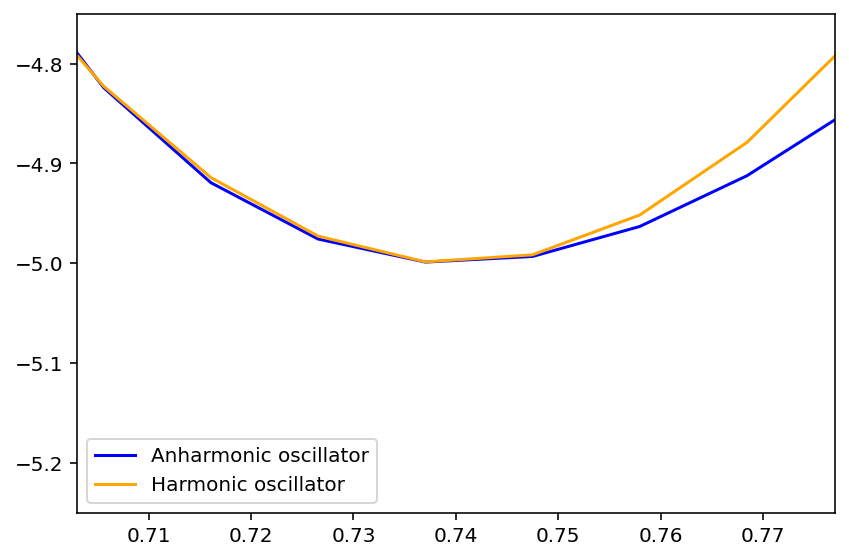

In [9]:
D_e = 5
r_e = 0.74
a = 5
r = np.linspace(0.6*r_e,2*r_e,100)

n_v = 20 # Number of vib levels
v = np.arange(1,n_v+1) # Vibrational energy levels
nu_bar = 1.2 #Fundamental frequency
x_e = 0.05 #Anharmonicity constant

def v_morse(r):
    v_morse = D_e*((1-np.exp(-a*(r-r_e)))**2) - D_e
    return v_morse

def v_harm(r):
    v_harm = 30*a*(r-r_e)**2 - D_e
    return v_harm

#def e_harm(v):
#    e_harm = (v+0.5)*nu_bar -D_e
#    return e_harm
#
#def e_anharm(v):
#    e_anharm = nu_bar*((v+0.5) - (((v+0.5)**1)*x_e)) - 1*D_e
#    return e_anharm

plt.figure(figsize=(6,4))
plt.plot(r,v_morse(r),'blue',label='Anharmonic oscillator')
plt.plot(r,v_harm(r),'orange',label='Harmonic oscillator')
plt.arrow(0,0,2*r_e,0,color='black',linestyle='dotted')
#plt.hlines(e_anharm(v), 4.5, 5.5, color='k', linestyles='solid')
#plt.hlines(e_anharm(v[0]), 4.5, 5.5, color='red', linestyles='solid')
#plt.hlines(e_harm(v), 5.5, 6.5, color='k', linestyles='solid')
#plt.hlines(e_harm(v[0]), 5.5, 6.5, color='red', linestyles='solid')
#plt.hlines(e_anharm(v[len(v)-1]), 5.5, 6.5, color='green', linestyles='solid')

#plt.hlines(0, 0, 10, color='blue', linestyles='--')

plt.legend()
plt.ylim(-1.05*D_e,-0.95*D_e)
plt.xlim(0.95*r_e,1.05*r_e)

plt.tight_layout()
#plt.savefig('ch1-diatomicexamp.pdf',transparent=True)
#plt.savefig('ch1-diatomicexamp.png',transparent=True)
#plt.savefig('ch1-diatomicexamp.svg',transparent=True)
plt.savefig('slides-diatomicexamp3.pdf',transparent=True)
plt.savefig('slides-diatomicexamp3.png',transparent=True)
plt.savefig('slides-diatomicexamp3.svg',transparent=True)
plt.show()